# Linear regression

Pros: Easy to interpret results, computationally inexpensive

Cons: Poorly models nonlinear data

Works with: Numeric values, nominal values

Our goal when using regression is to predict a numeric target value. One way to do
this is to write out an equation for the target value with respect to the inputs. For
example, assume you’re trying to forecast the horsepower of your sister’s boyfriend’s
automobile. One possible equation is

HorsePower = 0.0015*annualSalary - 0.99*hoursListeningToPublicRadio

This is known as a regression equation. The values 0.0015 and -0.99 are known as regression
weights. The process of finding these regression weights is called regression. Once
you’ve found the regression weights, forecasting new values given a set of inputs is
easy.

All you have to do is multiply the inputs by the regression weights and add them
together to get a forecast.

### General approach to regression

1. Collect: Any method.

2. Prepare: We’ll need numeric values for regression. Nominal values should be
mapped to binary values.

3. Analyze: It’s helpful to visualized 2D plots. Also, we can visualize the regression
weights if we apply shrinkage methods.

4. Train: Find the regression weights.

5. Test: We can measure the R2, or correlation of the predicted value and data, to
measure the success of our models.

6. Use: With regression, we can forecast a numeric value for a number of inputs.
This is an improvement over classification because we’re predicting a continuous
value rather than a discrete category.



In [2]:
from numpy import *

def loadDataSet(fileName):      #general function to parse tab -delimited floats
    numFeat = len(open(fileName).readline().split('\t')) - 1 #get number of fields 
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr =[]
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

StandRegres(), is the function that computes the
best-fit line. You first load the x and y arrays and then convert them into matrices.
Next you compute XTX and then test if its determinate is zero. If the determinate
is zero, then you’ll get an error when you try to compute the inverse.

In [4]:
def standRegres(xArr,yArr):
    xMat = mat(xArr); yMat = mat(yArr).T
    
    xTx = xMat.T*xMat
    if linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    #for solving unknown matrices: ws = linalg.solve(xTx,xMat.T*yMatT)
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [5]:
xArr,yArr=loadDataSet('ex0.txt')

In [13]:
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [7]:
ws = standRegres(xArr,yArr)

In [8]:
ws

matrix([[ 3.00774324],
        [ 1.69532264]])

In [14]:
xMat = mat(xArr)

In [15]:
yMat = mat(yArr)

In [16]:
yHat = xMat * ws

matrix([[ 3.12257084],
        [ 3.73301922],
        [ 4.69582855],
        [ 4.25946098],
        [ 4.67099547],
        [ 3.89977285],
        [ 3.65007895],
        [ 3.06514517],
        [ 3.23286683],
        [ 3.24221654],
        [ 3.42785945],
        [ 4.10677005],
        [ 4.24737842],
        [ 3.40925159],
        [ 4.6518468 ],
        [ 4.03763819],
        [ 3.61572324],
        [ 3.25838991],
        [ 4.08905393],
        [ 3.39829811],
        [ 3.12681762],
        [ 3.12159094],
        [ 4.57689489],
        [ 4.22453225],
        [ 3.03380205],
        [ 3.575795  ],
        [ 3.07638008],
        [ 3.36812645],
        [ 4.05412689],
        [ 3.92524508],
        [ 3.08463121],
        [ 3.22264573],
        [ 3.95116656],
        [ 4.53547307],
        [ 4.63266931],
        [ 3.47321272],
        [ 3.67637171],
        [ 4.48687834],
        [ 3.70271024],
        [ 4.54873897],
        [ 3.29055527],
        [ 4.13515992],
        [ 3.4548456 ],
        [ 3

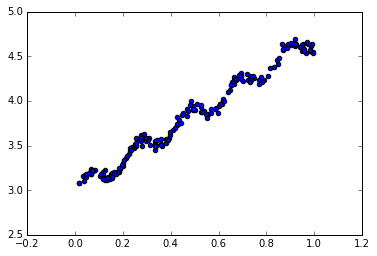

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0])

## To plot the best-line fit


Pyplot will have a problem if the points on our
line are out of order, so we first sort the points in ascending order

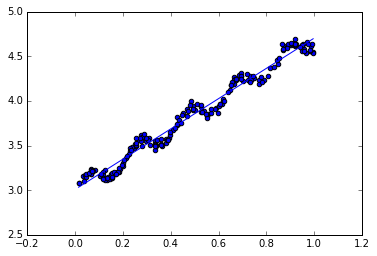

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0])
xCopy = xMat.copy()
xCopy.sort(0)
yHat = xCopy*ws
ax.plot(xCopy[:,1],yHat)
plt.show()

In [35]:
yHat = xMat*ws

In [36]:
corrcoef(yHat.T,yMat)

array([[ 1.        ,  0.98647356],
       [ 0.98647356,  1.        ]])

This gives you the correlation between all possible pairs; elements on the diagonal
are 1.0 because the correlation between yMat and yMat is perfect. The correlation
between yHat and yMat is 0.98.

### Locally weighted linear regression

One way to reduce the mean-squared error is a technique known as locally weighted
linear regression (LWLR). In LWLR we give a weight to data points near our data point
of interest; then we compute a least-squares regression. 

In [38]:
#creates a diagonal weights matrix called weights
def lwlr(testPoint,xArr,yArr,k=1.0):
    xMat = mat(xArr); yMat = mat(yArr).T
    m = shape(xMat)[0]
    #The weights matrix is a square matrix with as many elements as data points. This assigns one weight to each
    #data point.
    weights = mat(eye((m)))
    for j in range(m):                      #next 2 lines create weights matrix
        diffMat = testPoint - xMat[j,:]     #
        #The input k controls how quickly the decay happens. We have to specify it.
        weights[j,j] = exp(diffMat*diffMat.T/(-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

In [40]:
#This is helpful for evaluating the size of k.
def lwlrTest(testArr,xArr,yArr,k=1.0):  #loops over all the data points and applies lwlr to each one
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat

In [41]:
#estimate a single point with the following
yArr[0]

3.176513

In [42]:
lwlr(xArr[0],xArr,yArr,1.0)

matrix([[ 3.12204471]])

In [43]:
lwlr(xArr[0],xArr,yArr,0.001)

matrix([[ 3.20175729]])

#### To get an estimate for all the points in our dataset, you can use lwlrTest()

In [68]:
yHat = lwlrTest(xArr, xArr, yArr,0.003)

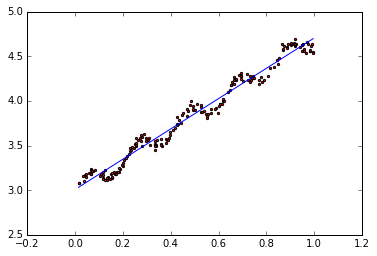

In [61]:
import matplotlib.pyplot as plt
xMat = mat(xArr)
srtInd = xMat[:,1].argsort(0)
xSort = xMat[srtInd][:,0,:]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1],yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0], mat(yArr).T.flatten().A[0] , s=5,
c='red')
plt.show()

With k=1.0, the weights are so large
that they appear to weight all the data equally, and you have the same best-fit line as
using standard regression.

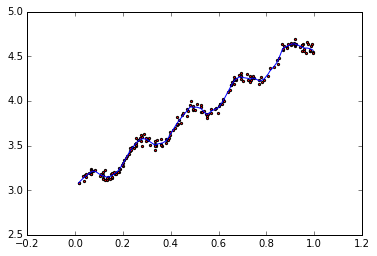

In [63]:
import matplotlib.pyplot as plt
xMat = mat(xArr)
srtInd = xMat[:,1].argsort(0)
xSort = xMat[srtInd][:,0,:]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1],yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0], mat(yArr).T.flatten().A[0] , s=5,
c='red')
plt.show()

Using k=0.01 does a much better job of capturing the
underlying pattern in the data.

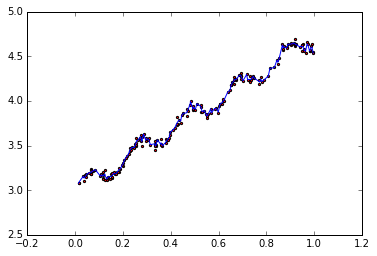

In [69]:
import matplotlib.pyplot as plt
xMat = mat(xArr)
srtInd = xMat[:,1].argsort(0)
xSort = xMat[srtInd][:,0,:]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:,1],yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0], mat(yArr).T.flatten().A[0] , s=5,
c='red')
plt.show()

Using k=0.003. This is
too noisy and fits the line closely to the data. 
k = 0.003 is an example of overfitting, whereas k = 1.0 is an example of underfitting.

In [71]:
def lwlrTestPlot(xArr,yArr,k=1.0):  #same thing as lwlrTest except it sorts X first
    yHat = zeros(shape(yArr))       #easier for plotting
    xCopy = mat(xArr)
    xCopy.sort(0)
    for i in range(shape(xArr)[0]):
        yHat[i] = lwlr(xCopy[i],xArr,yArr,k)
    return yHat,xCopy

### rssError() will give us a single number describing the error of our estimate

In [72]:
def rssError(yArr,yHatArr): #yArr and yHatArr both need to be arrays
    return ((yArr-yHatArr)**2).sum()

In [73]:
abX,abY=loadDataSet('abalone.txt')

In [81]:
yHat01 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],0.1)

In [82]:
yHat1 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],1)

In [83]:
yHat10 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],10)

In [84]:
rssError(abY[0:99],yHat01.T)

56.804197255611498

In [85]:
rssError(abY[0:99],yHat1.T)

429.8905618702197

In [86]:
rssError(abY[0:99],yHat10.T)

549.11817088267856

Using a smaller kernel will give us a lower error, so why don’t we use the smallest
kernel all the time? Using the smallest kernel will overfit our data.

### Prediction on new data

In [93]:
yHat01=lwlrTest(abX[100:199],abX[0:99],abY[0:99],0.1)

In [95]:
yHat1=lwlrTest(abX[100:199],abX[0:99],abY[0:99],1)

In [90]:
yHat10=lwlrTest(abX[100:199],abX[0:99],abY[0:99],10)

In [94]:
rssError(abY[100:199],yHat01.T)

106085.40657203968

In [96]:
rssError(abY[100:199],yHat1.T)

573.5261441895799

In [97]:
rssError(abY[100:199],yHat10.T)

517.57119053828137

This is our test error, and the smallest value of the test error
occurred with a kernel size of 10. The kernel size of 10 gave us the largest training
error. Let’s see how these errors compare to our simple linear regression:

In [98]:
ws = standRegres(abX[0:99],abY[0:99])
yHat=mat(abX[100:199])*ws
rssError(abY[100:199],yHat.T.A)

518.63631532533987

Simple linear regression did almost as well as the locally weighted linear regression.
This demonstration illustrates one fact, and that is that in order to choose the best
model you have to see how the model does on unknown data.

## Shrinking coefficients to understand our data

### Ridge regression

If we have more features than data points (n>m), we say that our data matrix X isn’t
full rank. When the data isn’t full rank, we’ll have a difficult time computing the
inverse.
Ridge regression adds an additional matrix to the matrix so that it’s non-singular.

it can also be used to add bias into our estimations, giving
us a better estimate.

ridgeRegres(), implements ridge regression for any given
value of lambda. If no value is given, lambda defaults to 0.2

In [99]:
def ridgeRegres(xMat,yMat,lam=0.2):
    xTx = xMat.T*xMat
    denom = xTx + eye(shape(xMat)[1])*lam
    if linalg.det(denom) == 0.0:
        print ("This matrix is singular, cannot do inverse")
        return
    ws = denom.I * (xMat.T*yMat)
    return ws

To use ridge regression and all shrinkage methods, you need to first normalize your
features.

ridgeTest(), shows an example of how to normalize the data. This
is done by subtracting off the mean from each feature and dividing by the variance

After the regularization is done, you call ridgeRegres() with 30 different lambda
values. The values vary exponentially so that you can see how very small values of
lambda and very large values impact your results. The weights are packed into a
matrix and returned.

In [101]:
def ridgeTest(xArr,yArr):
    xMat = mat(xArr); yMat=mat(yArr).T
    yMean = mean(yMat,0)
    yMat = yMat - yMean     #to eliminate X0 take mean off of Y
    #regularize X's
    xMeans = mean(xMat,0)   #calc mean then subtract it off
    xVar = var(xMat,0)      #calc variance of Xi then divide by it
    xMat = (xMat - xMeans)/xVar
    numTestPts = 30
    wMat = zeros((numTestPts,shape(xMat)[1]))
    for i in range(numTestPts):
        ws = ridgeRegres(xMat,yMat,exp(i-10))
        wMat[i,:]=ws.T
    return wMat


In [102]:
ridgeWeights = ridgeTest(abX,abY)

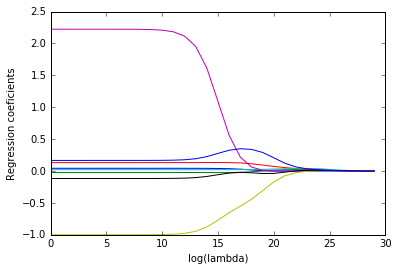

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ridgeWeights)
plt.ylabel('Regression coeficients')
plt.xlabel('log(lambda)')
plt.show()

On the very left where lambda is the smallest, you have the full values of our coefficients, which are the same as linear regression. On the
right side, the coefficients are all zero. Somewhere in the middle, you have some coefficient
values that will give you better prediction results. To find satisfactory answers,
you’d need to do cross-validation testing.

There are other shrinkage methods such as the lasso, LAR, PCA regression and
subset selection.

When two or more of the features are correlated, we may have a very large positive
weight and a very large negative weight using regular least-squares regression. By
using ridge regression we’re avoiding this problem because the weights are subject to
the previous constraint.

### The lasso

The lasso imposes a different constraint on the weights. We’re taking the absolute value instead of the square of all
the weights as in Ridge Regresssion.

Using a slightly different constraint will give us different results. If  is
small enough, some of the weights are forced to be exactly 0, which makes it easier to
understand our data.



## Forward stagewise regression

A greedy algorithm in that at each step it makes the
decision that will reduce the error the most at that step. Initially, all the weights are
set to 0. The decision that’s made at each step is increasing or decreasing a weight
by some small amount.

Pseudo-code would look like this:

Regularize the data to have 0 mean and unit variance

For every iteration:

    Set lowestError to + infinity

    For every feature:

        For increasing and decreasing:
        
            Change one coefficient to get a new W

            Calculate the Error with new W
            
            If the Error is lower than lowestError: set Wbest to the current W

        Update set W to Wbest

In [107]:
def regularize(xMat):#regularize by columns
    inMat = xMat.copy()
    inMeans = mean(inMat,0)   #calc mean then subtract it off
    inVar = var(inMat,0)      #calc variance of Xi then divide by it
    inMat = (inMat - inMeans)/inVar
    return inMat

In [118]:
def stageWise(xArr,yArr,eps=0.01,numIt=100):
    xMat = mat(xArr); yMat=mat(yArr).T
    yMean = mean(yMat,0)
    yMat = yMat - yMean     #can also regularize ys but will get smaller coef
    xMat = regularize(xMat)
    m,n=shape(xMat)
    returnMat = zeros((numIt,n)) #testing code remove
    #ws, to hold our w values,and you create two copies for use in the greedy optimization.
    ws = zeros((n,1)); wsTest = ws.copy(); wsMax = ws.copy()
    for i in range(numIt):
        #print out the w vector so you have some idea what’s going on inside
        #print (ws.T)
        lowestError = inf; 
        for j in range(n):
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] += eps*sign
                yTest = xMat*wsTest
                #The error is measured by the squared error, which is calculated by the rssError() function
                rssE = rssError(yMat.A,yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:]=ws.T
    return returnMat

In [119]:
xArr,yArr=loadDataSet('abalone.txt')

In [120]:
stageWise(xArr,yArr,0.01,200)

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ..., 
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])

One thing to notice is that w1 and w6 are exactly 0. This means they don’t contribute
anything to the result. These variables are probably not needed

With the eps variable
set to 0.01, after some time the coefficients will all saturate and oscillate between certain
values because the step size is too large. Here you can see that the first weight is
oscillating between 0.04 and 0.005.

Let’s try again with a smaller step size and many more steps:

In [122]:
stageWise(xArr,yArr,0.001,5000)

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ..., 
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.044, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187]])

###### Let’s compare these answers to the least-squares weights.

In [125]:
xMat=mat(xArr)
yMat=mat(yArr).T
xMat=regularize(xMat)
yM = mean(yMat,0)
yMat = yMat - yM
weights=standRegres(xMat,yMat.T)
weights.T

matrix([[ 0.0430442 , -0.02274163,  0.13214087,  0.02075182,  2.22403814,
         -0.99895312, -0.11725427,  0.16622915]])

The benefit is this algorithm allows
you to better understand your models and build better models. When building a
model, you’d want to run this algorithm and find out which features are important.
You may choose to stop collecting data for unimportant features. Ultimately, you’d
want to build many models with w values from the algorithm and after every 100 iterations
test these. To test these models, you’d do something like tenfold cross validation
and choose the model that minimizes error.